### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [2]:
# Se cargan los datos. 
data=pd.read_csv('kc_house_data.csv', sep=';', encoding = 'utf-8')

In [4]:
# Cantidad de datos y número de variables
data.shape

(20095, 21)

In [5]:
# Mostrar los datos
data.head()

,id,date,price,bedrooms,bathrooms,sqft living,sqft lot,floors,waterfront,view,...,grade,sqft above,sqft basement,yr built,yr renovated,zipcode,lat,long,sqft living15,sqft lot15
0,5101402488,20140624T000000,438000,3,1.75,1520,6380,1.0,0,0,...,7,790,730,1948,0,98115,47.695,-122.304,1520,6235
1,1873100390,20150302T000000,719000,4,2.50,2570,7173,2.0,0,0,...,8,2570,0,2005,0,98052,477.073,-122.110,2630,6026
2,8562750320,20141110T000000,580500,3,2.50,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,475.391,-122.070,2580,3980
3,2426039314,20141201T000000,280000,2,1.50,1190,1265,3.0,0,0,...,7,1190,0,2005,0,98133,477.274,-122.357,1390,1756
4,461000390,20140624T000000,687500,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,476.823,-122.368,1460,5000


In [6]:
# Es recomendable que todos los pasos preparación se realicen sobre otro archivo.
data_t = data

### 3. Exploración y descripción de los datos


In [7]:
# Perfilar los datos
data_t.describe()

,id,price,bedrooms,bathrooms,sqft living,sqft lot,floors,waterfront,view,condition,grade,sqft above,sqft basement,yr built,yr renovated,zipcode,lat,long,sqft living15,sqft lot15
count,2.009500e+04,20095.000000,20095.000000,20095.000000,20095.000000,2.009500e+04,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000
mean,4.610466e+09,467065.093207,3.319781,2.038044,1954.059517,1.452180e+04,1.471062,0.002886,0.161383,3.404081,7.502662,1691.611694,262.447823,1970.778353,72.578900,98078.579099,430.656508,-122.213130,1907.721125,12391.785021
std,2.878156e+09,195522.284942,0.910581,0.703023,755.198372,4.002382e+04,0.536441,0.053648,0.617406,0.645434,1.014075,711.325325,403.682585,29.095242,373.572506,53.299835,131.159160,0.142614,600.508764,26471.802613
min,1.000102e+06,75000.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.184000,-122.519000,399.000000,651.000000
25%,2.141301e+09,314000.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1952.000000,0.000000,98033.000000,473.774000,-122.330000,1460.000000,5040.000000
50%,3.905121e+09,433000.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1500.000000,0.000000,1974.000000,0.000000,98065.000000,475.453000,-122.233000,1790.000000,7529.000000
75%,7.340601e+09,592000.000000,4.000000,2.500000,2410.000000,1.026000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2080.000000,500.000000,1996.000000,0.000000,98118.000000,476.715000,-122.122000,2260.000000,9836.500000
max,9.900000e+09,999999.000000,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.315000,4950.000000,871200.000000


In [8]:
# Tipos de datos
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20095 non-null  int64  
 1   date           20095 non-null  object 
 2   price          20095 non-null  int64  
 3   bedrooms       20095 non-null  int64  
 4   bathrooms      20095 non-null  float64
 5   sqft living    20095 non-null  int64  
 6   sqft lot       20095 non-null  int64  
 7   floors         20095 non-null  float64
 8   waterfront     20095 non-null  int64  
 9   view           20095 non-null  int64  
 10  condition      20095 non-null  int64  
 11  grade          20095 non-null  int64  
 12  sqft above     20095 non-null  int64  
 13  sqft basement  20095 non-null  int64  
 14  yr built       20095 non-null  int64  
 15  yr renovated   20095 non-null  int64  
 16  zipcode        20095 non-null  int64  
 17  lat            20095 non-null  float64
 18  long  

In [9]:
# ¿Hay ausencias?
data_t.isna().sum()/len(data_t)

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft living      0.0
sqft lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft above       0.0
sqft basement    0.0
yr built         0.0
yr renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft living15    0.0
sqft lot15       0.0
dtype: float64

In [10]:
# ¿Hay duplicados?
data_t.duplicated(keep = 'first').sum()

0

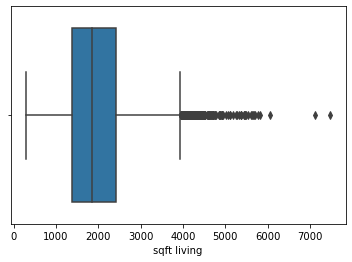

In [11]:
# ¿Hay outliers? 
sns.boxplot(y=data_t['sqft living'], orient="h")

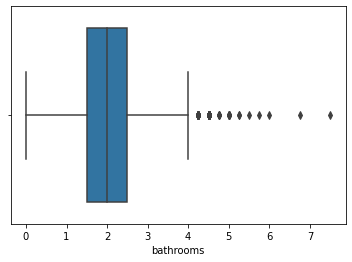

In [12]:
sns.boxplot(y=data_t['bathrooms'], orient="h")

### 4. Preparación de los datos

In [13]:
# Eliminación del indentificador de fila y código zip
data_t=data_t.drop(['id', 'date','zipcode'], axis=1)

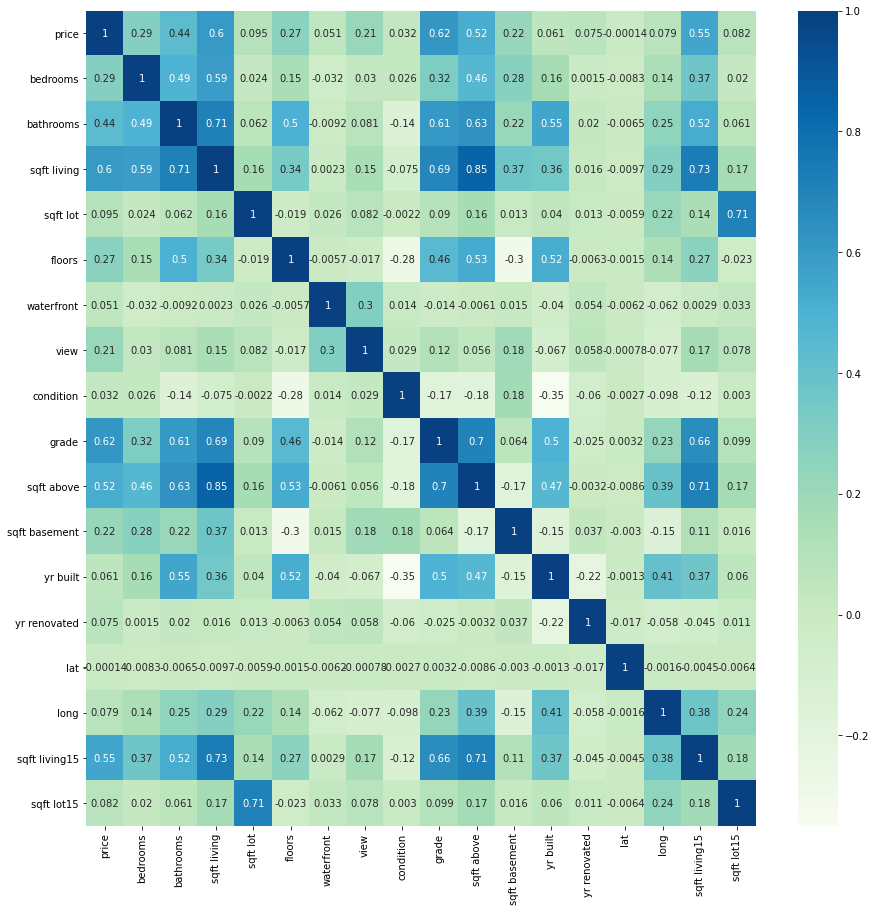

In [14]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,15))
correlacion = data_t.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

### 5. Construcción del modelo

In [15]:
# Se selecciona la variable objetivo, en este caso "precio".
Y=data_t['price']
# Del conjunto de datos se elimina la variable "precio".
X=data_t.drop(['price'], axis=1)

In [16]:
# Mostramos nuestros datos
X.head()

,bedrooms,bathrooms,sqft living,sqft lot,floors,waterfront,view,condition,grade,sqft above,sqft basement,yr built,yr renovated,lat,long,sqft living15,sqft lot15
0,3,1.75,1520,6380,1.0,0,0,3,7,790,730,1948,0,47.695,-122.304,1520,6235
1,4,2.50,2570,7173,2.0,0,0,3,8,2570,0,2005,0,477.073,-122.110,2630,6026
2,3,2.50,2320,3980,2.0,0,0,3,8,2320,0,2003,0,475.391,-122.070,2580,3980
3,2,1.50,1190,1265,3.0,0,0,3,7,1190,0,2005,0,477.274,-122.357,1390,1756
4,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,476.823,-122.368,1460,5000


In [17]:
Y.head()

0    438000
1    719000
2    580500
3    280000
4    687500
Name: price, dtype: int64

In [18]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

Antes de construir el modelo debemos crear un objeto de la clase LinearRegression.

In [19]:
# Primero se crea el objeto para construir el modelo
modelo_regresion = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion

LinearRegression()

A continuación, procedemos a entrenar el modelo utilizando el conjunto de entrenamiento.

In [20]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train,Y_train)

LinearRegression()

### 6. Evaluación del modelo
Las métricas de evaluación nos van a permitir determinar qué tan bien se desempeña un modelo; es decir, cómo se ajusta a los datos. En esta sección se utilizan las siguientes métricas

1. Mean-Squared-Error(MSE). Error medio cuadrático
2. Mean-Absolute-Error(MAE). Error absoluto medio
3. R² or Coeficiente de determinación.

In [21]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 129353.28
MAE: 101938.13
R²: 0.56


In [22]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 131199.68
MAE: 103677.96
R²: 0.55


Una vez determinado el rendimiento de generalización utilizando el conjunto test podemos tomar todos los datos y construir el modelo final.

In [23]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X,Y)

LinearRegression()

In [24]:
# Podemos visualizar los parámetros del modelos (coeficientes de regresión)
modelo_regresion.coef_

array([-1.21076848e+04,  2.56259805e+04,  4.23834719e+01,  1.50764162e-01,
        5.24600511e+04,  8.68104810e+04,  1.59949108e+04,  1.68541291e+04,
        8.74904717e+04,  5.57273660e+00,  3.68107353e+01, -2.52143423e+03,
        3.06607758e+00,  2.20995592e+00, -1.11745285e+04,  5.90932871e+01,
       -2.26956211e-01])

In [25]:
# importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia = modelo_regresion.coef_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,grade,87490.471695
1,waterfront,86810.480975
2,floors,52460.051121
3,bathrooms,25625.980493
4,condition,16854.129148
5,view,15994.910773
6,sqft living15,59.093287
7,sqft living,42.383472
8,sqft basement,36.810735
9,sqft above,5.572737


### 7. Interpretación del modelo
Otro aspecto que debemos tener en cuenta es la significancia estadística de los coeficientes. Para determinarla, se aplica la prueba t de Student o t-test, con las siguientes hipótesis sobre los coeficientes:

H0: wi = 0, es decir, no hay una relación lineal entre la variable dependiente y la independiente.

Ha: wi ≠ 0, es decir, sí existe una relación lineal entre ambas variables.

El p-valor (en inglés p-value) del coeficiente verifica entonces la hipótesis nula de la siguiente forma:
Si el p-valor es menor o igual que el nivel de significancia seleccionado, entonces se puede afirmar que los datos suministran suficiente evidencia para rechazar la hipótesis nula. Es decir, cambios en la variable independiente estarán asociados con cambios en la variable dependiente y esta relación es estadísticamente significativa, por lo que la variable independiente será importante para el modelo de regresión.
Si el p-valor es mayor que el nivel de significancia, entonces no hay suficiente evidencia en los datos para rechazar la hipótesis nula y concluir que w1 es significativamente diferente de 0.

Por otra parte, el valor de un coeficiente determina cuánto aumenta o se reduce el valor promedio de la variable dependiente cuando la independiente cambia por una unidad. El signo del coeficiente indica si la relación es positiva o negativa.


Podemos sacar un reporte que nos va a permitir analizar estadísticos del modelo.

In [28]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
# Mostrar las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          1.786e+04
Date:                Mon, 20 Sep 2021   Prob (F-statistic):                        0.00
Time:                        06:47:00   Log-Likelihood:                     -2.6510e+05
No. Observations:               20095   AIC:                                  5.302e+05
Df Residuals:                   20079   BIC:                                  5.304e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -1.208e+04   1294.683     -9.328      0.000   -1.46e+04   -9539.365
bathrooms      2.533e+04   2254.538     11.237      0.000    2.09e+04    2.98e+04
sqft living      42.4723      1.690     25.129      0.000      39.159      45.785
sqft lot          0.1576      0.032      4.859      0.000       0.094       0.221
floors         5.123e+04   2407.074     21.283      0.000    4.65e+04    5.59e+04
waterfront     8.458e+04    1.8e+04      4.708      0.000    4.94e+04     1.2e+05
view           1.564e+04   1624.643      9.628      0.000    1.25e+04    1.88e+04
condition      1.729e+04   1555.749     11.116      0.000    1.42e+04    2.03e+04
grade          8.677e+04   1458.175     59.509      0.000    8.39e+04    8.96e+04
sqft above        6.6139      1.608      4.113      0.000       3.462       9.766
sqft basement    35.8584      1.865     19.232      0.000      32.204      39.513
yr built      -2461.5707     44.309    -55.554      0.000   -2548.421   -2374.721
yr renovated      3.7176      2.591      1.435      0.151      -1.362       8.797
lat               2.3842      6.983      0.341      0.733     -11.303      16.071
long          -3.517e+04    702.565    -50.065      0.000   -3.66e+04   -3.38e+04
sqft living15    60.5207      2.475     24.457      0.000      55.670      65.371
sqft lot15       -0.2140      0.049     -4.329      0.000      -0.311      -0.117
==============================================================================
Omnibus:                      403.851   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.838
Skew:                           0.297   Prob(JB):                    7.77e-104
Kurtosis:                       3.463   Cond. No.                     3.19e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.7e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 8. Almacenamiento  del modelo.
Puedes guardar tu modelo para que lo puedas recuperar cuando lo desees o llevarlo a producción.

In [27]:
# Una forma de guardar el modelo es a través de la funcionalidad joblib.
import joblib

In [ ]:
# Ahora guardamos el modelo con el nombre que selecciones.
joblib.dump(modelo_regresion, 'ModeloRegresion.joblib')
# Si lo quieres recuperar más tarde puedes utilizar la siguiente instrucción:
# modelo = load('ModeloRegresion.joblib') 